In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [2]:
#storing datasets and keeping an original copy

train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")

train_original = train.copy()
test_original = test.copy()

In [3]:
#exploring my datasets
train.head(5)
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
test.head(5)
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

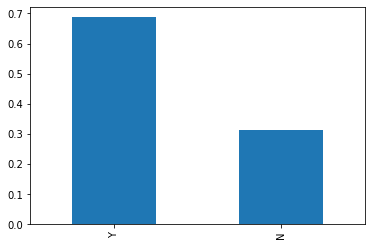

In [5]:
#exploring my target variable from the model I am training

loan_stats = train['Loan_Status'].value_counts(normalize=True)
loan_stats_plot = loan_stats.plot.bar() #around 70% loan acceptance rate

In [6]:
#observing my data types to create the remaining plots
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

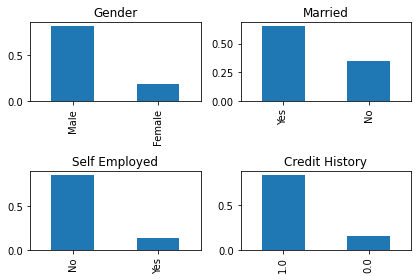

In [7]:
#visualizing my categorical independent variables
plt.subplot(2, 2, 1)
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.subplot(2, 2, 2)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(2, 2, 3)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')
plt.subplot(2, 2, 4)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')
plt.tight_layout()
plt.show()

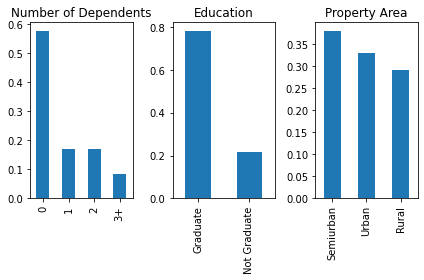

In [8]:
#visualizing my ordinal independent variables
plt.subplot(1, 3, 1)
train['Dependents'].value_counts(normalize=True).plot.bar(title="Number of Dependents")
plt.subplot(1,3,2)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(1,3,3)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property Area')
plt.tight_layout()
plt.show()

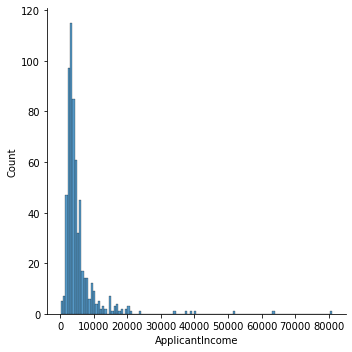

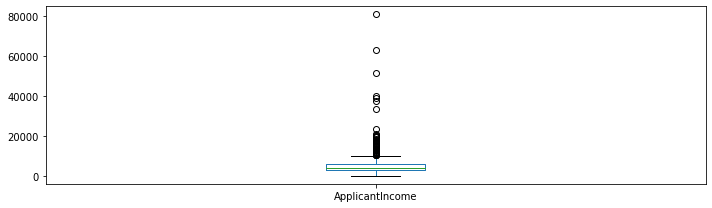

In [9]:
#visualizing numerical independent variables
sns.displot(train['ApplicantIncome'])
plt.show()
train['ApplicantIncome'].plot.box(figsize=(10,3))
plt.tight_layout()
plt.show() #income is skewed and not normally distributed with outliers

In [10]:
#filling the missing values
train.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
#fill missing values using the mode
train['Gender'].fillna((train['Gender']).mode()[0], inplace=True)
train['Married'].fillna((train['Married']).mode()[0], inplace=True)
train['Dependents'].fillna((train['Dependents']).mode()[0], inplace=True)
train['Self_Employed'].fillna((train['Self_Employed']).mode()[0], inplace=True)
train['Credit_History'].fillna((train['Credit_History']).mode()[0], inplace=True)

In [12]:
train['Loan_Amount_Term'].value_counts()
train['Loan_Amount_Term'].fillna((train['Loan_Amount_Term']).mode()[0], inplace=True)

In [13]:
#filling LoanAmount using the median since it has many outliers
train['LoanAmount'].fillna((train['LoanAmount']).median(), inplace=True)

In [14]:
#checking for any missing values now
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
#filling missing values in my test dataset the same way
test['Gender'].fillna((test['Gender']).mode()[0], inplace=True)
test['Married'].fillna((test['Married']).mode()[0], inplace=True)
test['Dependents'].fillna((test['Dependents']).mode()[0], inplace=True)
test['Self_Employed'].fillna((test['Self_Employed']).mode()[0], inplace=True)
test['Credit_History'].fillna((test['Credit_History']).mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna((test['Loan_Amount_Term']).mode()[0], inplace=True)
test['LoanAmount'].fillna((test['LoanAmount']).median(), inplace=True)

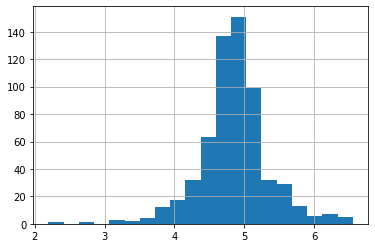

In [16]:
#using log to get rid of outliers in my LoanAmount
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [17]:
#dropping irrelevant columns before building the model
test = test.drop('Loan_ID', axis=1)
train = train.drop('Loan_ID', axis=1)

In [18]:
#building first model with Logistic Regression and creating dummy variables
X = train.drop('Loan_Status', 1)
y= train.Loan_Status
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

X_train, x_cv, y_train, y_cv=train_test_split(X,y, test_size=0.3)

In [19]:
#testing and fitting model

model=LogisticRegression()
model.fit(X_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1,
                   max_iter=100, multi_class='over', n_jobs=1, penalty='12',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
pred_cv=model.predict(x_cv)

In [20]:
#checking my model's accuracy
score = accuracy_score(y_cv,pred_cv)
print('Logistic Regression prediction score is ',round(score*100,2),'%', sep='')

Logistic Regression prediction score is 81.62%


In [21]:
#predicting using Decision Tree algorithm while utilizing the stratfield method
i=1

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('This model is',round(score*100,2),"% accurate.")
print()
print("Average accuracy for this model is", round(np.mean(score*100),2),'%.')


1 of kfold 5
This model is 70.73 % accurate.

1 of kfold 5
This model is 72.36 % accurate.

1 of kfold 5
This model is 70.73 % accurate.

1 of kfold 5
This model is 71.54 % accurate.

1 of kfold 5
This model is 68.85 % accurate.

Average accuracy for this model is 68.85 %.


In [22]:
#predicting using Random Forest algorithm while utilizing the stratfield method
i=1
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('This model is',round(score*100,2),"% accurate.")
print()
print("Average accuracy for this model is", round(np.mean(score*100),2),'%.')


1 of kfold 5
This model is 80.49 % accurate.

1 of kfold 5
This model is 81.3 % accurate.

1 of kfold 5
This model is 80.49 % accurate.

1 of kfold 5
This model is 82.11 % accurate.

1 of kfold 5
This model is 73.77 % accurate.

Average accuracy for this model is 73.77 %.


In [23]:
#predicting using XGBoost algorithm while utilizing the stratfield method
i=1
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = XGBClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('This model is',round(score*100,2),"% accurate.")
print()
print("Average accuracy for this model is", round(np.mean(score*100),2),'%.')


1 of kfold 5
[01:37:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
This model is 79.67 % accurate.

1 of kfold 5
[01:37:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
This model is 80.49 % accurate.

1 of kfold 5
[01:37:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'

In [24]:
#predicting using Logisitic Regression algorithm while utilizing the stratfield method
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('This model is',round(score*100,2),"% accurate.")
print()
print("Average accuracy for this model is", round(np.mean(score*100),2),'%.')


1 of kfold 5
This model is 80.49 % accurate.

1 of kfold 5
This model is 83.74 % accurate.

1 of kfold 5
This model is 78.05 % accurate.

1 of kfold 5
This model is 78.86 % accurate.

1 of kfold 5
This model is 79.51 % accurate.

Average accuracy for this model is 79.51 %.


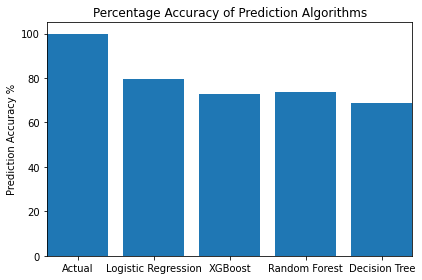

In [25]:
#plotting my prediction percentages

percentages = [100, 79.51, 72.95, 73.77, 68.85]
methods = ('Actual', 'Logistic Regression', 'XGBoost', 'Random Forest', 'Decision Tree')
y_pos = np.arange(len(methods))
plt.bar(y_pos, percentages, align='center', alpha=1)
plt.xticks(y_pos, methods)
plt.ylabel('Prediction Accuracy %')
plt.title("Percentage Accuracy of Prediction Algorithms")
plt.margins(x=0)
plt.tight_layout()
plt.show()


In [26]:
print("So from the figure above, the Logistic Regression method has the"
      " highest prediction accuracy which is around 80%.")
print()
print("It is going to predict that a loan would be approved around 80% of the times!")

So from the figure above, the Logistic Regression method has the highest prediction accuracy which is around 80%.
